In [7]:
from pathlib import Path
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [8]:
# firedata = Path("/Users/cwaigl/Projects/ak_fireoverview/data/external/FIRMS/DL_FIRE_J1V-C2_155000/fire_nrt_J1V-C2_155000.csv") 
firedata = Path("/Users/cwaigl/Projects/ak_fireoverview/data/external/FIRMS/DL_FIRE_M-C61_245946/fire_archive_M-C61_245946.csv") 

In [9]:
fire_df = pd.read_csv(firedata)

In [10]:
fire_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,55.7510,-119.1831,301.1,1.0,1.0,2001-01-01,541,Terra,MODIS,37,6.03,270.7,10.4,N,0
1,54.4272,-110.8799,305.0,1.7,1.3,2001-01-02,445,Terra,MODIS,63,6.03,265.2,26.7,N,0
2,54.4240,-110.8991,301.5,1.7,1.3,2001-01-02,445,Terra,MODIS,16,6.03,265.5,19.9,N,0
3,55.5531,-112.2986,307.5,1.0,1.0,2001-01-03,528,Terra,MODIS,64,6.03,268.3,13.2,N,0
4,55.5573,-112.2670,321.6,1.0,1.0,2001-01-03,528,Terra,MODIS,89,6.03,269.9,24.2,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10936393,52.9119,49.0355,301.1,1.9,1.3,2021-08-31,2226,Aqua,MODIS,38,6.03,281.2,19.1,N,0
10936394,48.3320,57.4420,310.8,1.0,1.0,2021-08-31,2227,Aqua,MODIS,81,6.03,286.7,13.7,N,2
10936395,48.2339,57.3583,308.7,1.0,1.0,2021-08-31,2227,Aqua,MODIS,75,6.03,284.8,12.1,N,2
10936396,50.3512,57.1391,321.3,1.0,1.0,2021-08-31,2227,Aqua,MODIS,100,6.03,283.9,22.3,N,2


In [11]:
fire_df.latitude.max()

83.1055

In [12]:
fire_df[fire_df.satellite=='Aqua']['acq_date'].min()

'2002-07-04'

In [16]:
fire_terra = fire_df.loc[fire_df.satellite=='Terra']
len(fire_terra)

5837177

In [20]:
fire_terra.latitude.min()

45.0

----

In [15]:
maskpth = Path("/Users/cwaigl/Projects/2020_firedanger_data/ERA_downscaling/mask/era5_boreal_tundra_mask.nc")
mask = xr.open_rasterio(maskpth)
mask

<xarray.DataArray (band: 1, y: 721, x: 1440)>
[1038240 values with dtype=int8]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * x        (x) float64 0.0 0.25 0.5 0.75 1.0 ... 358.8 359.0 359.2 359.5 359.8
Attributes:
    transform:   (0.25, 0.0, -0.125, 0.0, -0.25, 90.125)
    crs:         +init=epsg:4326
    res:         (0.25, 0.25)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

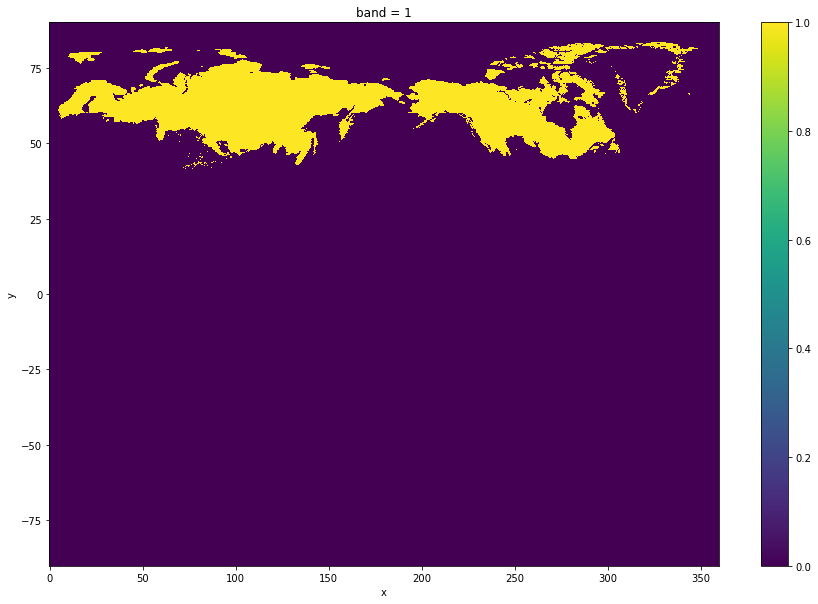

In [19]:
mask.plot(figsize=(15,10))

In [23]:
bylat = mask.sum(dim="x")
bylat.where(bylat.band>0)

<xarray.DataArray (band: 1, y: 721)>
array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.300e+01, 5.600e+01, 9.600e+01, 1.380e+02,
        1.570e+02, 1.770e+02, 1.840e+02, 2.350e+02, 2.270e+02, 2.050e+02,
        2.290e+02, 2.530e+02, 2.240e+02, 2.910e+02, 2.550e+02, 2.220e+02,
        1.910e+02, 1.810e+02, 1.720e+02, 1.820e+02, 1.950e+02, 1.350e+02,
        9.400e+01, 8.900e+01, 8.500e+01, 1.060e+02, 1.390e+02, 1.690e+02,
        1.880e+02, 1.920e+02, 2.190e+02, 2.520e+02, 2.940e+02, 3.150e+02,
        2.740e+02, 2.320e+02, 1.840e+02, 1.700e+02, 1.840e+02, 2.330e+02,
        3.050e+02, 2.990e+02, 3.150e+02, 3.230e+02, 3.600e+02, 3.860e+02,
        4.140e+02, 4.320e+02, 4.660e+02, 4.870e+02, 5.250e+02, 5.660e+02,
        5.990e+02, 6.220e+02, 6.690e+02, 7.280e+02, 7.670e+02, 7.850e+02,
        8.310e+02, 8.930e+02, 9.390e+02, 9.590e+02, 9.760e+02, 1.008e+03,
        1.031e+03, 1.031e+03, 1.058e+03, 1.077e+03, 1.089e+03, 1.088e+03,
        1.080e+03, 1.056e+03, 1.040e+03, 1.041e+03, 1.053e+03, 1.053e+03,
        1.035e+03, 1.004e+03, 1.006e+03, 1.016e+03, 1.005e+03, 1.017e+03,
        1.013e+03, 9.870e+02, 9.920e+02, 9.950e+02, 9.850e+02, 9.820e+02,
        9.630e+02, 9.610e+02, 9.620e+02, 9.510e+02, 9.390e+02, 9.310e+02,
...
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0

In [ ]:
mask

In [7]:
xedges = np.arange(-180, 180.25, 0.25)
yedges = np.arange(45, 85.25, 0.25)

firedensity, _, _ = np.histogram2d(
    fire_df.longitude.values,
    fire_df.latitude.values,
    bins=[xedges, yedges]
)

In [8]:
firedensity.shape

(1440, 160)

In [14]:
firedensity.max()

35351.0

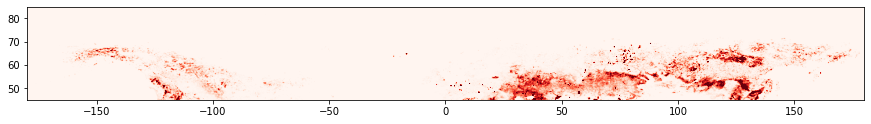

In [12]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
plt.imshow(np.flipud(firedensity.T), 
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          vmax=1000,
          cmap='Reds')

Text(0.5, 1.0, 'MODIS ')

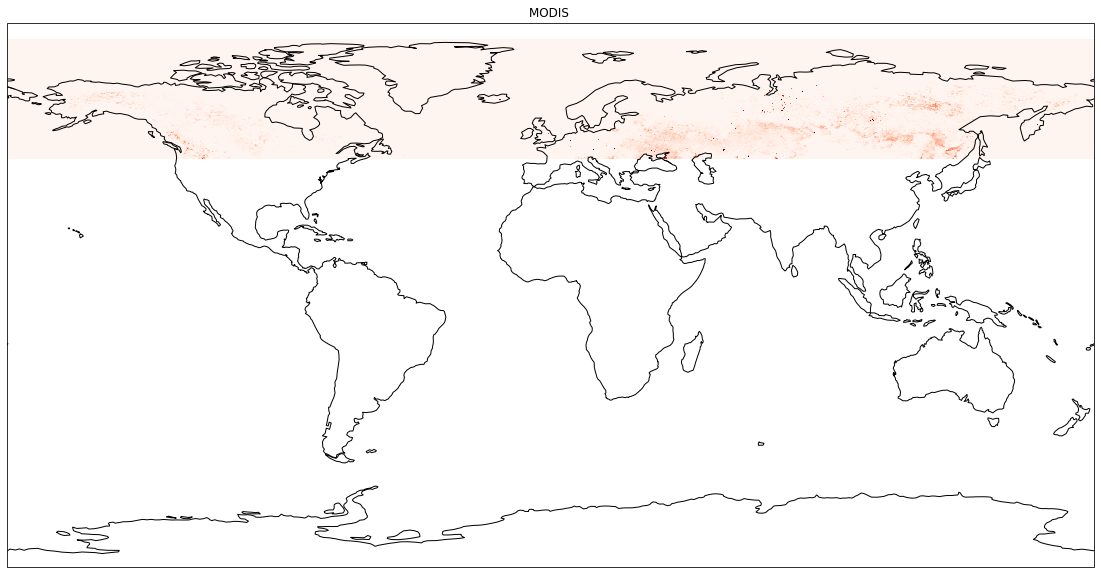

In [16]:
fig = plt.figure(figsize=(25, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.pcolormesh(xedges[:-1], yedges[:-1], firedensity.T, vmax=5000, cmap='Reds')
plt.title("MODIS ") 

----

In [26]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
import plotly.io as pio
pio.renderers.default = 'iframe'

In [57]:
fig = px.density_heatmap(
    fire_df, 
    x="longitude", y="latitude",
    range_x=[-180, 180],
    range_y=[45, 85],
    nbinsx=2880,
    nbinsy=160,
    range_color=[0, 100],
    color_continuous_scale='Sunsetdark'
)
fig.show()